In [9]:
pressures_au = []

with open("d:/msc/summer_project/P_V_data.txt", "r") as file:
    # Read the first line (titles) and ignore it
    titles = file.readline()

    # Iterate through each remaining line in the file
    for line in file:
        # Split the line into columns using tab as the delimiter
        values_in_this_line = line.strip().split("\t")
        value_in_second_column = float(values_in_this_line[1])
        pressures_au.append(value_in_second_column)
        
pressures_GPa = [x* 2.9421015697e4 for x in pressures_au]
print(pressures_au)

[-0.0006960107764065888, -0.0006988777245462026, -0.0005045056181645553, -3.774201379158113e-05, 0.0001912112647634661, 0.0011080624317742912]


In [10]:
import numpy as np

separations_111 = [3.97999991104007, 3.97999991104007, 3.93999991193414, 3.89999991282821, 3.85999991372228, 3.81999991461635]
separations_121 = [2.61999994143844, 2.61999994143844, 2.61999994143844, 2.61999994143844, 2.61999994143844, 2.57999994233251]
separations_131 = [4.45999990031123, 4.37999990209937, 4.29999990388751, 4.09999990835786, 4.05999990925193, 3.89999991282821]
separations_221 = [6.53999985381961, 6.13999986276031, 5.45999987795949, 5.17999988421798, 5.13999988511205, 5.01999988779426]
separations_231 = [5.77999987080693, 5.65999987348914, 5.45999987795949, 5.21999988332391, 5.21999988332391, 5.01999988779426]
separations_331 = [6.09999986365438, 5.89999986812472, 5.45999987795949, 5.29999988153577, 4.69999989494681, 4.45999990031123]

cns_111 = np.array([1.9999414379173608, 1.9999778067307972, 1.9999723391922388, 1.999971981856997, 1.9999718132408373, 1.9983359447793319])
cns_121 = np.array([0.9999753224423222, 0.9999753417280246, 0.9999518940905913, 0.9999778212681218, 0.9999777743971037, 0.9999514256688805])
cns_131 = np.array([3.724816303694887, 4.166433192992824,4.587738539774322, 4.965366755333836, 4.8504937263737595, 4.873271726531595])
cns_221 = np.array([2.5135714487426055,2.4176796401745597,3.0061924291985007, 3.9681262384803864, 3.9459380894422953, 3.648468508725892])
cns_231 = np.array([8.997868584151648, 9.944903224482006, 10.54948413690671, 11.184236619476556, 10.634479039975135, 10.981998213611014])
cns_331 = np.array([8.490881358782193, 8.27541059528106, 7.368510144260339, 8.301035589149823,6.403578649128797, 7.414861363271539])

all_CNs = [cns_111, cns_121, cns_131, cns_221, cns_231, cns_331]
all_separations = [separations_111, separations_121, separations_131, separations_221, separations_231, separations_331]

In [58]:
import matplotlib.pyplot as plt

blue_colour = '#0031ae'
red_colour = '#dc2f02'
pairs = ['111','121', '131', '221', '231','331']

def plot_cns_and_separations_for_pair(pair,separations, CNs, y2_lower, y2_upper, row,column,legend = False):
    #title_label = ''
    g_label = ''
    for character in pair[:-1]:
        if character == '1':
            g_label += 'O'
        elif character == '2':
            g_label += 'C'
        elif character == '3':
            g_label += 'Na'
        else:
            print('Invalid character:', character)
            break
    #title_label = g_label[:1] + '-' + g_label[1:]

    separations = [x*0.529177249 for x in separations]
    font_size = 8

    # Create the main figure and the first y-axis
    ax1 = axes[row,column]

    # Plot the data on the first y-axis
    line1, = ax1.plot(pressures_GPa, separations, color = blue_colour, marker = 'o', label = 'Distance')
    ax1.set_xlabel('Pressure [GPa]')
    ax1.set_ylabel('Distance [Å]', color=blue_colour)
    ax1.tick_params(axis='y', labelcolor=blue_colour)
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
            ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(font_size)

    # Create the second y-axis and link it to the first one
    ax2 = ax1.twinx()

    # Plot the data on the second y-axis
    line2, = ax2.plot(pressures_GPa, CNs, color = red_colour, marker = 'x', label = 'Coordination Number')
    ax2.set_ylabel('CN$_{\mathrm{' + g_label + '}}$', color=red_colour)
    ax2.tick_params(axis='y', labelcolor=red_colour)
    ax2.set_ylim(y2_lower, y2_upper)
    for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
            ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(font_size)

    if legend == True:
        lines = [line1, line2]
        labels = [line.get_label() for line in lines]
        ax2.legend(lines, labels, fontsize=font_size, ncol=2, loc='center', bbox_to_anchor=(-0.25, -0.5))
    else:
        pass

    #plt.title('Nearest Neighbour Separation and Coordination Number \n vs. Pressure for ' + title_label)


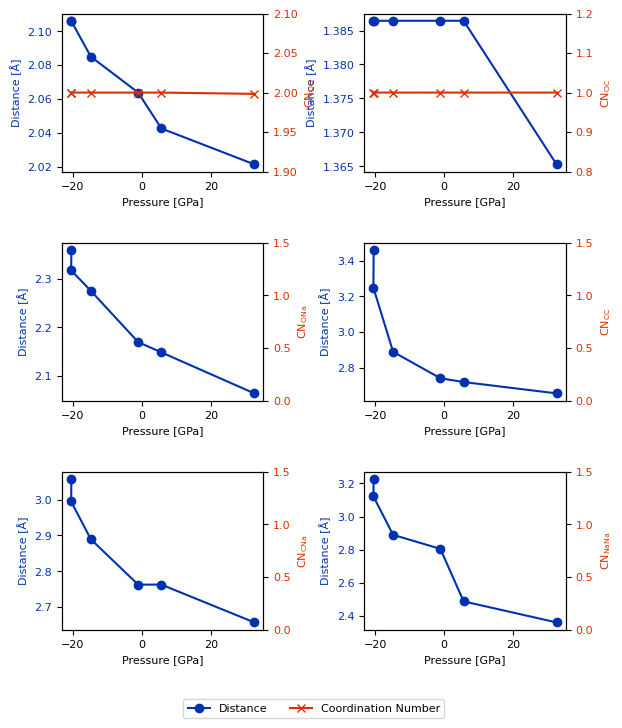

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6.5, 8))
plt.subplots_adjust(hspace=0.45, wspace = 0.5)

plot_cns_and_separations_for_pair('111', all_separations[0], all_CNs[0], y2_lower = 1.9, y2_upper = 2.1, row = 0, column = 0)
plot_cns_and_separations_for_pair('121', all_separations[1], all_CNs[1],y2_lower = 0.8, y2_upper = 1.2,row = 0, column = 1)

plot_cns_and_separations_for_pair('131', all_separations[2], all_CNs[2],y2_lower = 0, y2_upper = 1.5,row = 1, column = 0)
plot_cns_and_separations_for_pair('221', all_separations[3], all_CNs[3],y2_lower = 0, y2_upper = 1.5,row = 1, column = 1)

plot_cns_and_separations_for_pair('231', all_separations[4], all_CNs[4],y2_lower = 0, y2_upper = 1.5,row = 2, column = 0)
plot_cns_and_separations_for_pair('331', all_separations[5], all_CNs[5],y2_lower = 0, y2_upper = 1.5,row = 2, column = 1, legend = True)

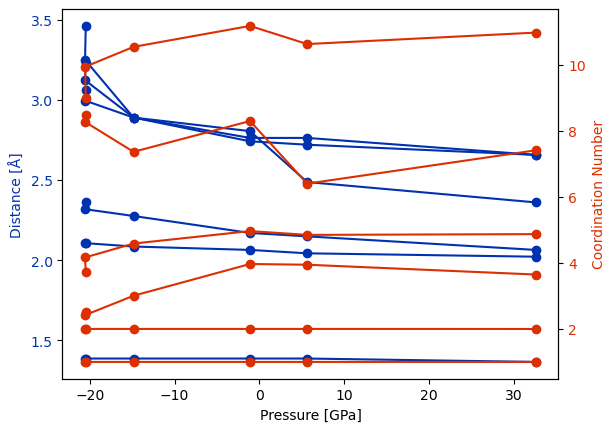

In [31]:
import matplotlib.pyplot as plt

blue_colour = '#0031ae'
red_colour = '#dc2f02'
pairs = ['111','121', '131', '221', '231','331']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for i in range(6):
    pair = pairs[i]
    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]


    separations = all_separations[i]
    separations = [x*0.529177249 for x in separations]
    CNs = all_CNs[i]

    # Create the main figure and the first y-axis

    # Plot the data on the first y-axis
    ax1.plot(pressures_GPa, separations, color = blue_colour, marker = 'o')
    ax1.set_xlabel('Pressure [GPa]')
    ax1.set_ylabel('Distance [Å]', color=blue_colour)
    ax1.tick_params(axis='y', labelcolor=blue_colour)

    # Create the second y-axis and link it to the first one

    # Plot the data on the second y-axis
    ax2.plot(pressures_GPa, CNs, color = red_colour, marker = 'o')
    ax2.set_ylabel('Coordination Number', color=red_colour)
    ax2.tick_params(axis='y', labelcolor=red_colour)